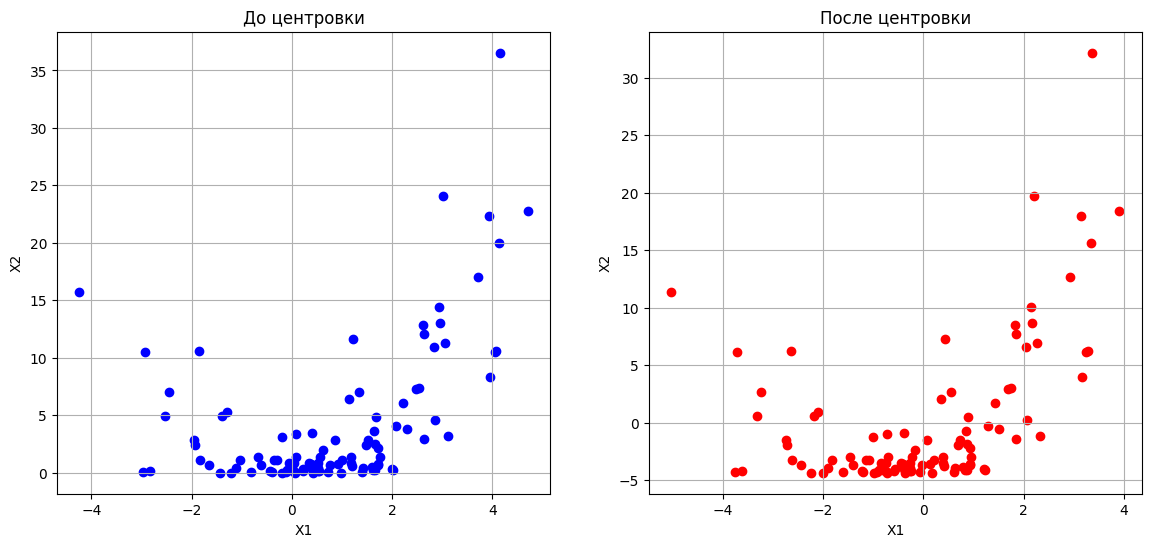

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
X1 = np.random.normal(1, 2, 100)  
X2 = (X1 + np.random.normal(0, 1, 100)) ** 2

# Собираем данные в DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2})

# Центрирование данных (вычитаем среднее)
data_centered = data - data.mean()

# График до и после центровки
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# До центровки
ax[0].scatter(data['X1'], data['X2'], color='blue', label='Данные')
ax[0].set_title("До центровки")
ax[0].set_xlabel("X1")
ax[0].set_ylabel("X2")
ax[0].grid(True)

# После центровки
ax[1].scatter(data_centered['X1'], data_centered['X2'], color='red', label='Центрованные данные')
ax[1].set_title("После центровки")
ax[1].set_xlabel("X1")
ax[1].set_ylabel("X2")
ax[1].grid(True)

plt.show()


In [13]:
# Вычисление ковариационной матрицы
cov_matrix = np.cov(data_centered.T)
print("Ковариационная матрица:")
print(cov_matrix)

Ковариационная матрица:
[[ 3.29907957  5.57680887]
 [ 5.57680887 41.64442644]]


In [14]:
# Собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nСобственные значения:")
print(eigenvalues)
print("\nСобственные векторы:")
print(eigenvectors)


Собственные значения:
[ 2.50447468 42.43903133]

Собственные векторы:
[[-0.99000117 -0.14105912]
 [ 0.14105912 -0.99000117]]


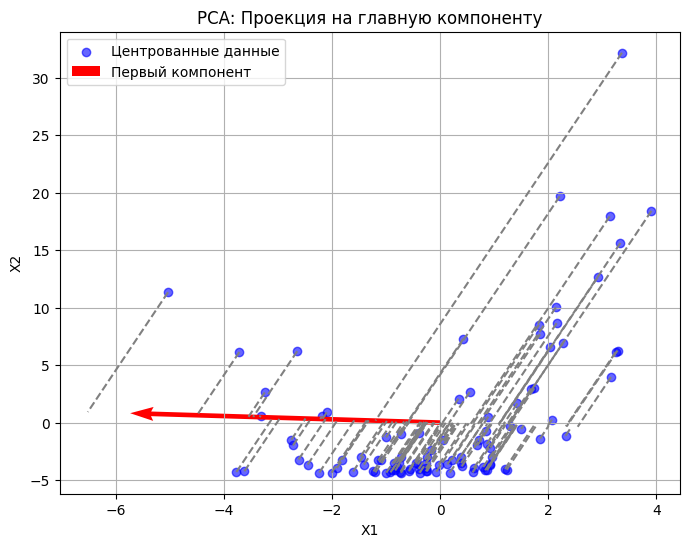

In [15]:
# Проекция данных на первый компонент
principal_component = np.dot(data_centered, eigenvectors[:, 0])

# График данных и главной компоненты
plt.figure(figsize=(8, 6))
plt.scatter(data_centered['X1'], data_centered['X2'], color='blue', alpha=0.6, label='Центрованные данные')

# Добавляем направление главной компоненты
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], angles='xy', scale=2, color='red', label='Первый компонент')

# Проекция каждой точки на главную компоненту (по красной линии)
for i in range(len(principal_component)):
    # Получаем проекцию точки на главную компоненту
    projection = principal_component[i] * eigenvectors[:, 0]
    plt.plot([data_centered['X1'][i], projection[0]], [data_centered['X2'][i], projection[1]], color='gray', linestyle='--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PCA: Проекция на главную компоненту')
plt.legend()
plt.grid(True)
plt.show()


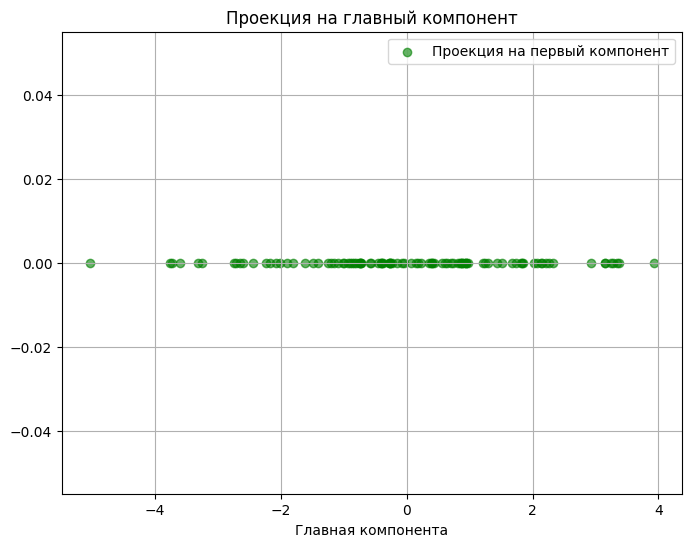

In [6]:
# Визуализируем результат проекции на главную компоненту
plt.figure(figsize=(8, 6))
plt.scatter(principal_component, np.zeros_like(principal_component), color='green', alpha=0.6, label='Проекция на первый компонент')
plt.title('Проекция на главный компонент')
plt.xlabel('Главная компонента')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def pca_by_distance(X, num_components=2):
    # Центрируем данные
    mean = np.mean(X, axis=0)
    X_centered = X - mean

    # Функция для поиска направления компоненты, минимизирующего расстояния
    def find_component(X_centered):
        # Инициализация случайного направления (можно использовать разные методы)
        direction = np.random.randn(X_centered.shape[1])
        direction = direction / np.linalg.norm(direction)  # Нормализуем

        # Градиентный спуск для нахождения компоненты
        learning_rate = 0.01
        for _ in range(1000):  # Количество итераций
            projections = X_centered.dot(direction)
            projection_matrix = projections[:, np.newaxis] * direction
            error = X_centered - projection_matrix  # Отклонение от проекций
            gradient = -2 * X_centered.T.dot(error)
            direction -= learning_rate * gradient  # Обновляем направление
            direction = direction / np.linalg.norm(direction)  # Нормализуем

        return direction

    components = []
    for _ in range(num_components):
        direction = find_component(X_centered)
        components.append(direction)

        # Ортогонализируем данные от найденной компоненты
        X_centered = X_centered - X_centered.dot(direction[:, np.newaxis]) * direction

    return np.array(components)

# Пример данных
np.random.seed(42)
X = np.random.randn(100, 2)

# Применение PCA через расстояния
components = pca_by_distance(X)

# Печать и визуализация
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5)
plt.quiver(0, 0, components[0][0], components[0][1], angles='xy', scale_units='xy', scale=1, color='red', label='Component 1')
plt.quiver(0, 0, components[1][0], components[1][1], angles='xy', scale_units='xy', scale=1, color='green', label='Component 2')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA by Distance')
plt.axis('equal')
plt.show()


ValueError: non-broadcastable output operand with shape (2,) doesn't match the broadcast shape (2,2)